In [1]:
import PyPDF2
import re

def pdf_to_sentences(pdf_path):
    sentences = []
    
    # PDF 파일 열기
    with open(pdf_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        
        # 각 페이지에 대해 반복
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            text = page.extract_text()
            
            # 문장 분리를 위한 정규표현식
            sentence_regex = re.compile(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s')
            page_sentences = sentence_regex.split(text)
            
            # 각 문장에 대해 공백 제거 후 리스트에 추가
            for sentence in page_sentences:
                sentence = sentence.strip()
                if sentence:
                    sentences.append(sentence)
    
    return sentences

# PDF 파일 경로
pdf_path = "휴대형 군사용 드론 폭탄 장치.pdf"

# 문장별로 파싱된 리스트 가져오기
parsed_sentences = pdf_to_sentences(pdf_path)

# 결과 출력
# for index, sentence in enumerate(parsed_sentences, start=1):
#     print(f"{index}. {sentence}")


/Users/basecamp/.pyenv/versions/3.8.16/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


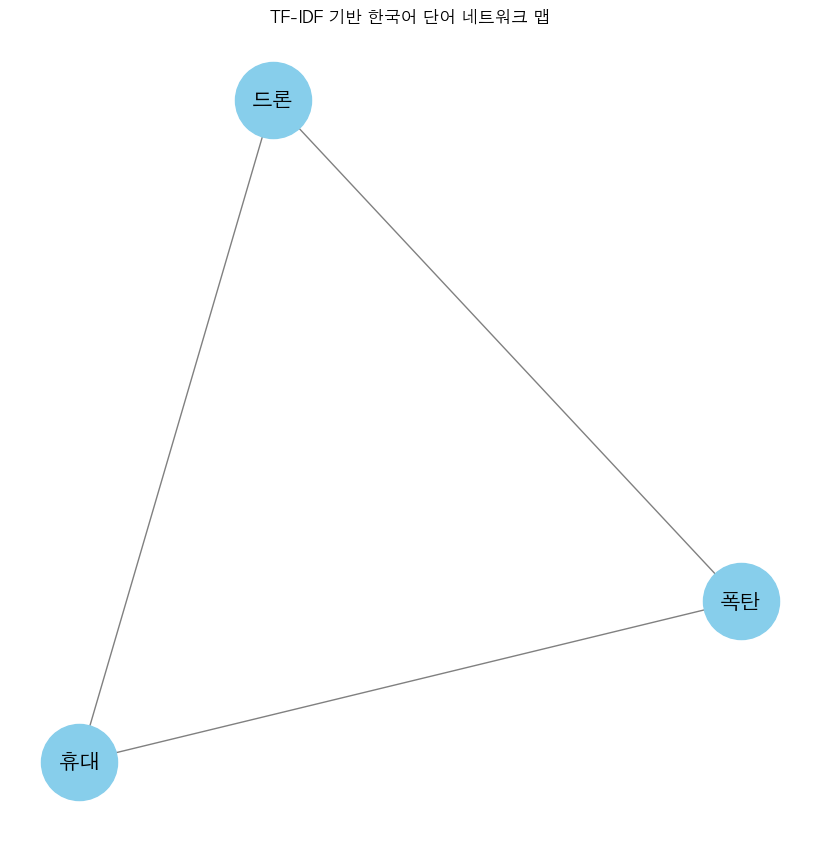

In [1]:
import PyPDF2
import re

def pdf_to_sentences(pdf_path):
    sentences = []
    
    # PDF 파일 열기
    with open(pdf_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        
        # 각 페이지에 대해 반복
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            text = page.extract_text()
            
            # 문장 분리를 위한 정규표현식
            sentence_regex = re.compile(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s')
            page_sentences = sentence_regex.split(text)
            
            # 각 문장에 대해 공백 제거 후 리스트에 추가
            for sentence in page_sentences:
                sentence = sentence.strip()
                if sentence:
                    sentences.append(sentence)
    
    return sentences

# PDF 파일 경로
pdf_path = "휴대형 군사용 드론 폭탄 장치.pdf"

# 문장별로 파싱된 리스트 가져오기
parsed_sentences = pdf_to_sentences(pdf_path)


#
#
#
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt
import numpy as np

from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 

# 예시 텍스트 데이터
# documents = parsed_sentences
documents = ["휴대형 군사용 드론 폭탄 장치"]
# 한국어 형태소 분석기 초기화
okt = Okt()

# 불용어 리스트
stopwords = set([
    "은", "는", "이", "가", "을", "를", "에", "에서", "으로", "와", "과"
    "이다", "하다", "것", "그", "이렇다", "그렇다", "되다", "같다",
    # 
    "아니다", "나타나다",
    "있다", "상기", "가능하다","특징", "보다", "특허", "발명", "또는", "하우",
    "되어다", "공개", "따르다", "이다", "포함", "실시", "구성", "청구", "사용",
    "주식회사", "청구항", "설명", "상태", "전체", "특허법", "모듈", "장치", "도면",
    "구비" , "명칭", "심사", "나타내다", "바라보다", "의하다", "늘다", "10", "100",
    "0154301", "및", "군", "수", "일", "의", "기", "로", "형", "예", "징", "항"
])

# 전처리 및 토큰화 함수
def preprocess(text):
    # 한글, 공백을 제외한 모든 문자 제거
    text = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", text)
    # 형태소 분석 및 불용어 처리
    tokens = okt.morphs(text, stem=True)
    tokens = [word for word in tokens if word not in stopwords]
    return " ".join(tokens)

def tokenize_and_remove_stopwords(doc):
    tokens = okt.morphs(doc, stem=True)
    tokens = [token for token in tokens if token not in stopwords]
    return tokens

preprocessed_documents = [preprocess(doc) for doc in documents]

# TfidfVectorizer 초기화
vectorizer = TfidfVectorizer(
    tokenizer=tokenize_and_remove_stopwords,
    max_features=10
    )
X = vectorizer.fit_transform(preprocessed_documents)

# 상위 10개 단어 추출
terms = vectorizer.get_feature_names_out()
tfidf_matrix = X.toarray()
sum_tfidf = tfidf_matrix.sum(axis=0)
top_indices = np.argsort(sum_tfidf)[-10:]
top_terms = terms[top_indices]

# 네트워크 그래프 생성
G = nx.Graph()

# 노드 추가
for term in top_terms:
    G.add_node(term)

# 간선 추가 (TF-IDF 값에 기반한 임의의 간선 연결)
threshold = 0.1
for i in range(len(top_terms)):
    for j in range(i + 1, len(top_terms)):
        if tfidf_matrix[:, top_indices[i]].sum() > threshold and tfidf_matrix[:, top_indices[j]].sum() > threshold:
            G.add_edge(top_terms[i], top_terms[j], weight=tfidf_matrix[:, top_indices[i]].sum() + tfidf_matrix[:, top_indices[j]].sum())

# 네트워크 그래프 시각화
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=15, font_weight="bold", edge_color="gray", width=1.0, edge_cmap=plt.cm.Blues, font_family="AppleGothic")
plt.title("TF-IDF 기반 한국어 단어 네트워크 맵")
plt.show()


In [2]:
terms

array(['드론', '폭탄', '휴대'], dtype=object)

In [2]:
###
import operator

# TF-IDF 벡터화 결과 확인
print("TF-IDF 행렬 크기:", X.shape)
print("단어 목록:", terms)
print()


# Calculate the mean TF-IDF score for each word across all documents
mean_tfidf_scores = np.mean(X, axis=0)

# Find the index of the word with the highest mean TF-IDF score
most_important_word_index = np.argmax(mean_tfidf_scores)

# Get the most important word using the index
most_important_word = terms[most_important_word_index]


# Display the most important word
print("가장 중요한 단어:", most_important_word)
print()

###

# Calculate the mean TF-IDF score for each word across all documents
mean_tfidf_scores = np.mean(tfidf_matrix, axis=0)

# Iterate over each word and its mean TF-IDF score
for word, score in zip(terms, mean_tfidf_scores.tolist()):
    print(f"Word: {word}, Mean TF-IDF Score: {score}")


aaa = {terms[i]:score for i,score in enumerate(mean_tfidf_scores.tolist())}
bbb = sorted(aaa.items(), reverse=True, key=operator.itemgetter(1))
# bbb

NameError: name 'X' is not defined

In [3]:
def convert_to_ts_format(graph_data):
    nodes = []
    edges = []

    # 노드와 엣지 정보 추출
    for edge, weight in graph_data.items():
        source, target = edge
        weight_label = f"{weight:.2f}"

        # 노드 추가
        if source not in [node['id'] for node in nodes]:
            nodes.append({"id": source, "label": source})
        if target not in [node['id'] for node in nodes]:
            nodes.append({"id": target, "label": target})

        # 엣지 추가
        edge_id = f"{source}-{target}"
        edges.append({"source": source, "target": target, "id": edge_id, "label": weight_label})

    return {"nodes": nodes, "edges": edges}


data = {(u, v): round(d['weight'], 2) for u, v, d in G.edges(data=True)}

ts_formatted_data = convert_to_ts_format(data)
print(ts_formatted_data["nodes"])
print(ts_formatted_data["edges"])


NameError: name 'G' is not defined